In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from wordcloud import WordCloud
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator
import numpy as np
import matplotlib as mpl
from matplotlib.patches import BoxStyle
import datetime

STOPWORDS = set(stopwords.words('english'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
df = pd.read_pickle('india_dataset_Mar_Apr.pkl')

In [11]:
def generate_word_cloud(mask_image, dict_term_freq, xpos, ypos, font_size, custom_text):
    ## you need to set the terms list
    image_mask = np.array(Image.open(mask_image))
    image_colors = ImageColorGenerator(image_mask)

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 2000, height = 1200, max_words = 500, normalize_plurals = True, mask=image_mask,
                          background_color ='black', font_step = 1, relative_scaling = 0.5, collocations = False, 
                          include_numbers = False, stopwords = stopwords).generate_from_frequencies(dict_term_freq)
                       
    plt.figure(figsize = (80, 50), facecolor = None)
    plt.style.use('dark_background')
    plt.imshow(wordcloud.recolor(color_func=image_colors))
    plt.text(xpos, ypos, custom_text, fontsize=font_size)
#     plt.text(xpos+50, ypos+50, "Generated by Nabanita Roy @https://github.com/royn5618", 
#              fontsize=font_size, rotation=90, style='italic', weight=20)
#     plt.text(xpos+100, ypos+100, "Generated by Nabanita Roy @https://github.com/royn5618", 
#              fontsize=font_size, rotation=90, style='italic', weight='bold', alpha=0.5)
    plt.axis("off")
    plt.show() 

In [4]:
def clean_terms_list(terms_list):
    terms_list = [x.strip().lower() for x in terms_list if x != 'char' and x.strip().lower() not in STOPWORDS 
                  and x.strip() not in string.punctuation and x.strip() not in ['’', '‘' , '–', '\'s', 'n\'t' , '’', '``', "''"] 
                  and '…' not in x and '+' not in x and len(x) != 1]
    terms_list = ['covid-19' if x == 'covid' else x for x in terms_list ]
    terms_list = ['government' if x == 'govt' else x for x in terms_list]
    terms_list = ['modi' if x == 'namo' else x for x in terms_list]
    return terms_list

In [5]:
def get_term_counts(terms_list):
    unique_words = set(terms_list)
    print('Numbert of unique words: {}'.format(len(unique_words)))
    dict_terms_count = {}
    for word in unique_words:
        dict_terms_count[word] = terms_list.count(word)
    return dict_terms_count

In [6]:
def get_term_frquency_scaled(dict_term_count):
    max_tf = max(dict_term_count.values())
    dict_tf_scaled = {}
    for word, count in dict_term_count.items():
        dict_tf_scaled[word] = count/max_tf
    sorted_dict_term_count = dict(sorted(dict_tf_scaled.items(), key=lambda kv: kv[1], reverse=True))
    return sorted_dict_term_count

In [7]:
column_list = ['title_normalized', 'content_normalized']
total_terms_in_cols = []
for col in column_list:
    print('Processing Column: {}'.format(col))
    temp_list = [k for i in list(df[col]) if i for j in i for k in j]
    for x in temp_list:
        total_terms_in_cols.append(x)
list_clean_terms = clean_terms_list(total_terms_in_cols)
print('Length of cleaned terms: {}'.format(len(list_clean_terms)))
dict_terms_count = get_term_counts(list_clean_terms)
sorted_dict_term_count = get_term_frquency_scaled(dict_terms_count)
print('Length of cleaned terms: {}'.format(len(sorted_dict_term_count)))

Processing Column: title_normalized
Processing Column: content_normalized
Length of cleaned terms: 195188
Numbert of unique words: 12995
Length of cleaned terms: 12995


In [8]:
list(sorted_dict_term_count.keys())[:10]

['covid-19',
 'coronavirus',
 'case',
 'say',
 'test',
 'positive',
 'government',
 'lockdown',
 'pandemic',
 'people']

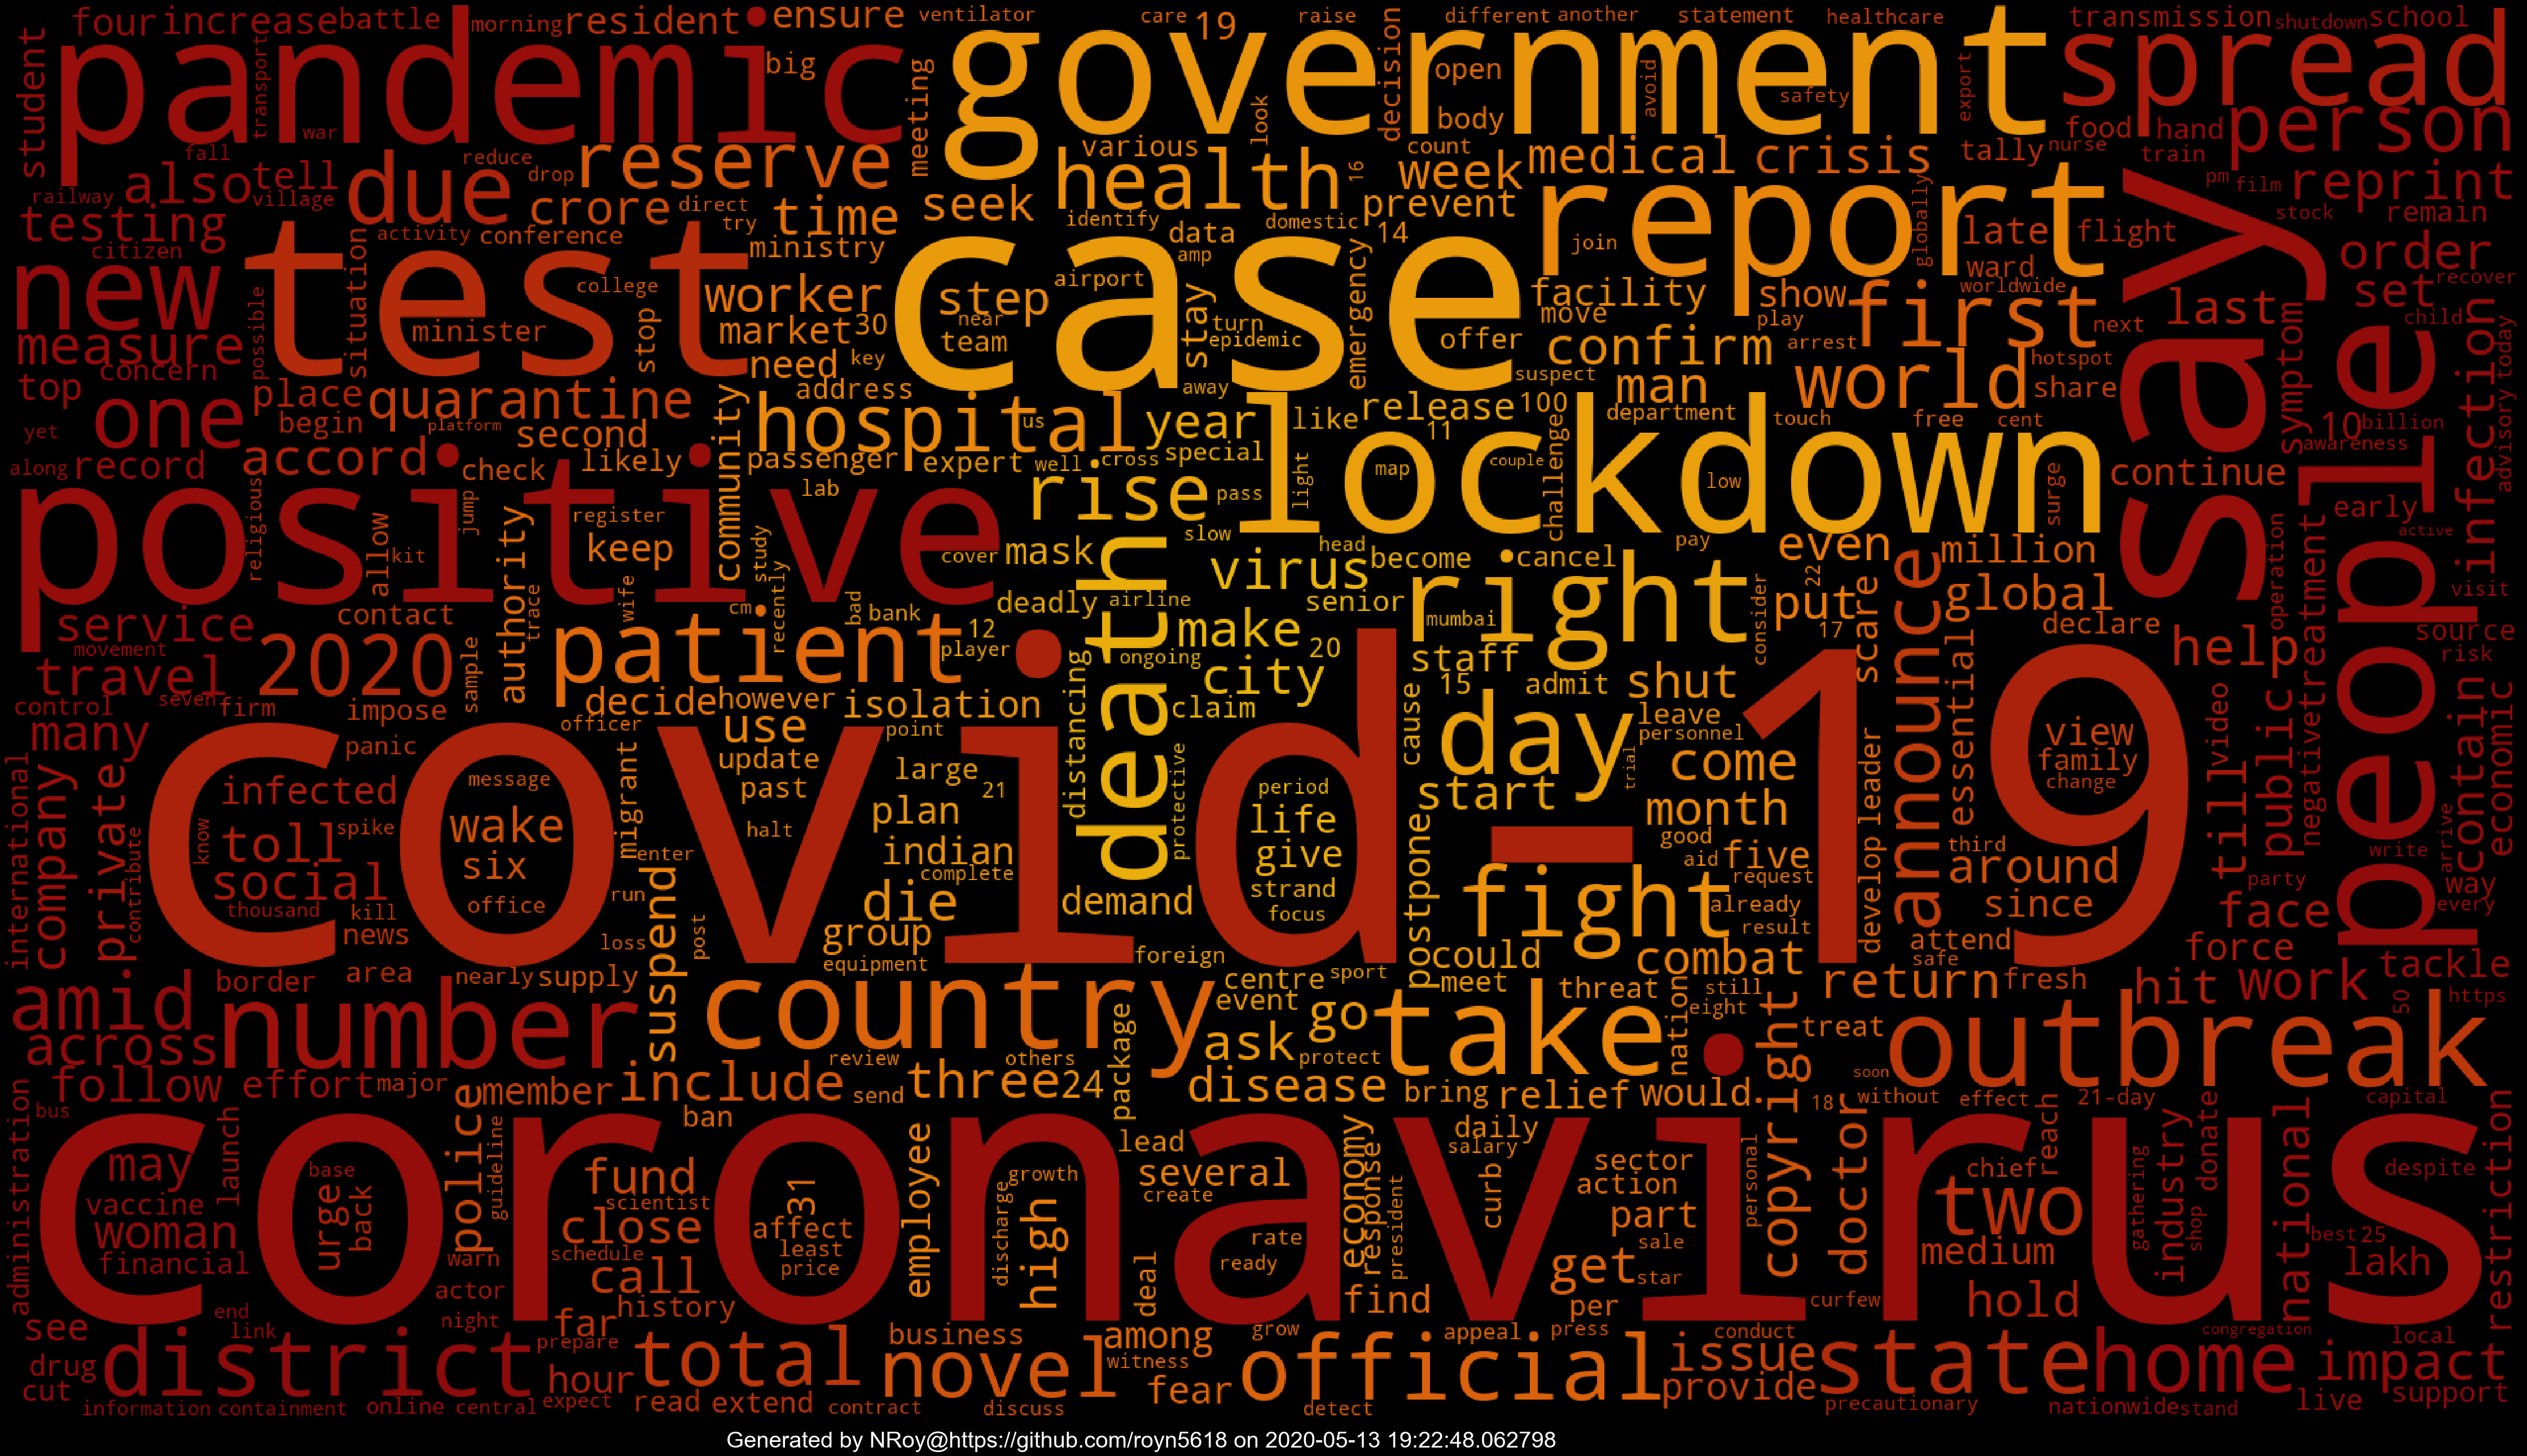

In [12]:
custom_text = "Generated by NRoy@https://github.com/royn5618 on " + str(datetime.datetime.now())
generate_word_cloud('red_yellow_mask3.jpg', sorted_dict_term_count, 550, 1100, 40, custom_text)

## Thanks for visiting!